### Imported libreries

In [1]:
# Data manipulation

import pandas as pd
import numpy as np
import json
import pickle
import math

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering & model preparation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest


# Functions
from utils import *


### 1. Data collection

In [2]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv")

df.to_excel("../data/raw/df.xlsx", index = False)

df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

**Description and types of Data**

- `id` --> Unique identifier of the listing (Numerical)

- `name` --> Title or short description of the listing provided by the host (Categorical)

- `host_id` --> Unique identifier of the host (Numerical)

- `host_name` --> Name of the host who owns the listing (Categorical)

- `neighbourhood_group` --> Group or district where the listing is located (e.g. Manhattan, Brooklyn) (Categorical)

- `neighbourhood` --> Specific neighborhood within the neighbourhood group (Categorical)

- `latitude` --> Latitude coordinate of the listing location (Numerical)

- `longitude` --> Longitude coordinate of the listing location (Numerical)

- `room_type` --> Type of accommodation offered (e.g. Entire home/apt, Private room) (Categorical)

- `price` --> Price per night of the listing in dollars (Numerical)

- `minimum_nights` --> Minimum number of nights required to book the listing (Numerical)

- `number_of_reviews` --> Total number of reviews received by the listing (Numerical)

- `last_review` --> Date of the most recent review (Categorical)

- `reviews_per_month` --> Average number of reviews received per month (Numerical)

- `calculated_host_listings_count` --> Number of listings owned by the same host (Numerical)

- `availability_365` --> Number of days the listing is available for booking in a year (Numerical)

### 2. Exploration anda data cleaning

In [3]:
target = "price"

rows, columns = df.shape
print(f"The dimensions of this dataset are {rows} rows and {columns} columns")

The dimensions of this dataset are 48895 rows and 16 columns


In [4]:
# Information about the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Visualization of null values

In [5]:
missing_df = missing_values_summary(df)
missing_df


Missing Count  Missing Percent (%)
reviews_per_month          10052                20.56
last_review                10052                20.56
host_name                     21                 0.04
name                          16                 0.03

**Conclusions:**

- The dataset consists of a total of 48,895 rows, where each row represents an accommodation listing, and 16 columns describing different characteristics of these listings, including the target variable `price`.

- The variables `last_review` and `reviews_per_month` contain around 10,000 missing values, representing approximately 20% of the total data set, but this may be due to holiday periods so I think it's good to keep this data.

- The geographical variables `latitude` and `longitude` allow the location of the listings and may be relevant for analyzing the distribution of prices across different areas.

- Variables such as `room_type`, `neighbourhood_group`, `minimum_nights` and `availability_365` appear to be particularly relevant, as they potentially have a direct influence on the accommodation price. In contrast, variables such as `id` and `host_name` do not seem to be relevant. 

- The dataset includes 10 numerical features and 6 categorical features.

#### Visualization of duplicatied values

In [6]:
filt_df = remove_duplicates(df, id = "id")

filt_df.head()

Number of duplicate rows (excluding 'id'): 0
No duplicates found.


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#### Drop irrelevant variables

In [7]:
# As we have mentioned, the `id`, `host_name`, `name` and `host_id` columns do not appear to be relevant and we will not take them into account.

filt_df.drop(["id", "host_name", "name", "host_id"], axis= 1, inplace= True)
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

### 3. Analysis of univariate variables

#### Categorical variables

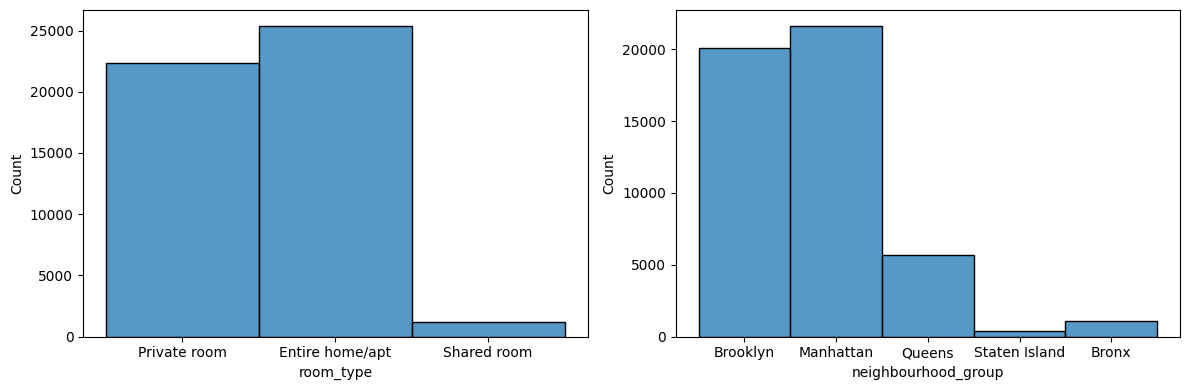

In [8]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(ax=axis[0], data=filt_df, x="room_type")
sns.histplot(ax=axis[1], data=filt_df, x="neighbourhood_group")


plt.tight_layout()
plt.show()




**Conclusions:**

- The majority of listed accommodations are entire homes and private rooms, while shared rooms represent a minimal portion of the total.

- In terms of geographic distribution, most of the listings are located in Brooklyn and Manhattan. Queens also has a significant number of listings, while the Bronx and Staten Island have a considerably smaller presence.



#### Numeric variables

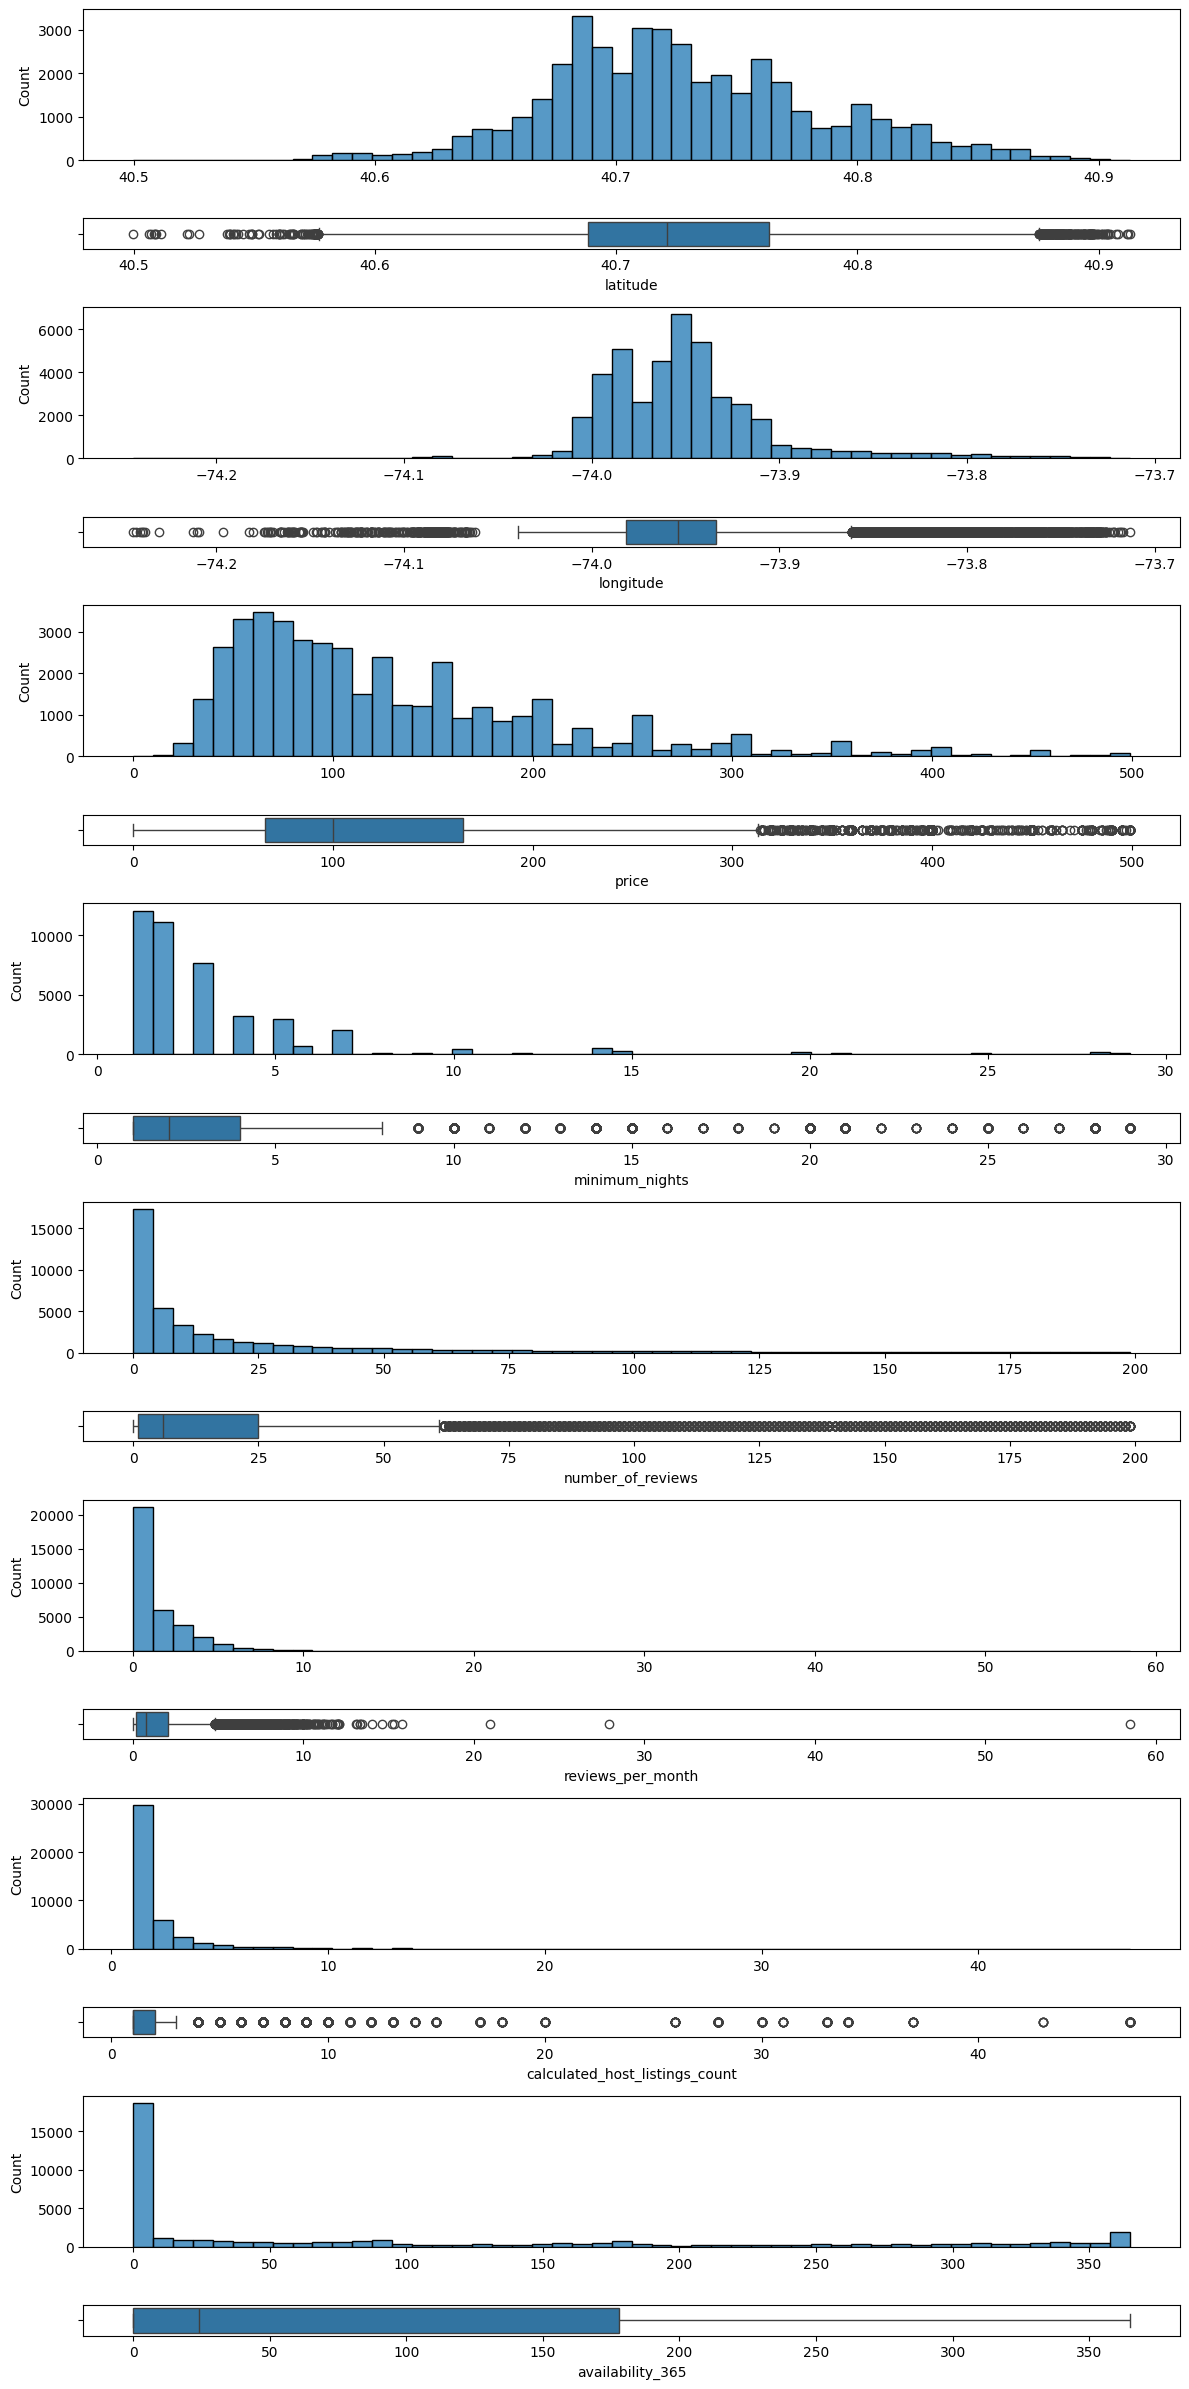

In [9]:
numerical_cols = filt_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


df_filtered_uni = filt_df[
    (filt_df['price'] < 500) &
    (filt_df['minimum_nights'] < 30) &
    (filt_df['number_of_reviews'] < 200) &
    (filt_df['calculated_host_listings_count'] < 50)
]

fig, axes = plt.subplots(
    nrows=len(numerical_cols)*2, 
    ncols=1, 
    figsize=(12, 24),
    gridspec_kw={'height_ratios':[5,1]*len(numerical_cols)}
)


for i, col in enumerate(numerical_cols):
    row_hist = i*2
    row_box = i*2 + 1

    sns.histplot(ax=axes[row_hist], data=df_filtered_uni, x=col, bins=50).set(xlabel=None)
    sns.boxplot(ax=axes[row_box], data=df_filtered_uni, x=col)


plt.tight_layout()
plt.show()

**Conclusions:**

- Price: Most listings fall within the lower price range, between $200 and $300 per night, although there are many outliers above this range.

- Minimum stay: Most listings allow short stays, although some require longer stays.

- Number of reviews: There is a high concentration of listings with few reviews, although this may be due to recent listings. There are also listings with a large number of reviews.

- Reviews per month: Most listings have low monthly activity and account for the majority of the data.

- Properties per host: Most hosts manage a small number of properties, although a minority manage a large number of listings.

- Availability: There is significant variation in availability throughout the year, but a large number of properties have very low availability, with values ​​close to 0.

### Analysis multivariate 

#### Analysis Numerical-Numerical

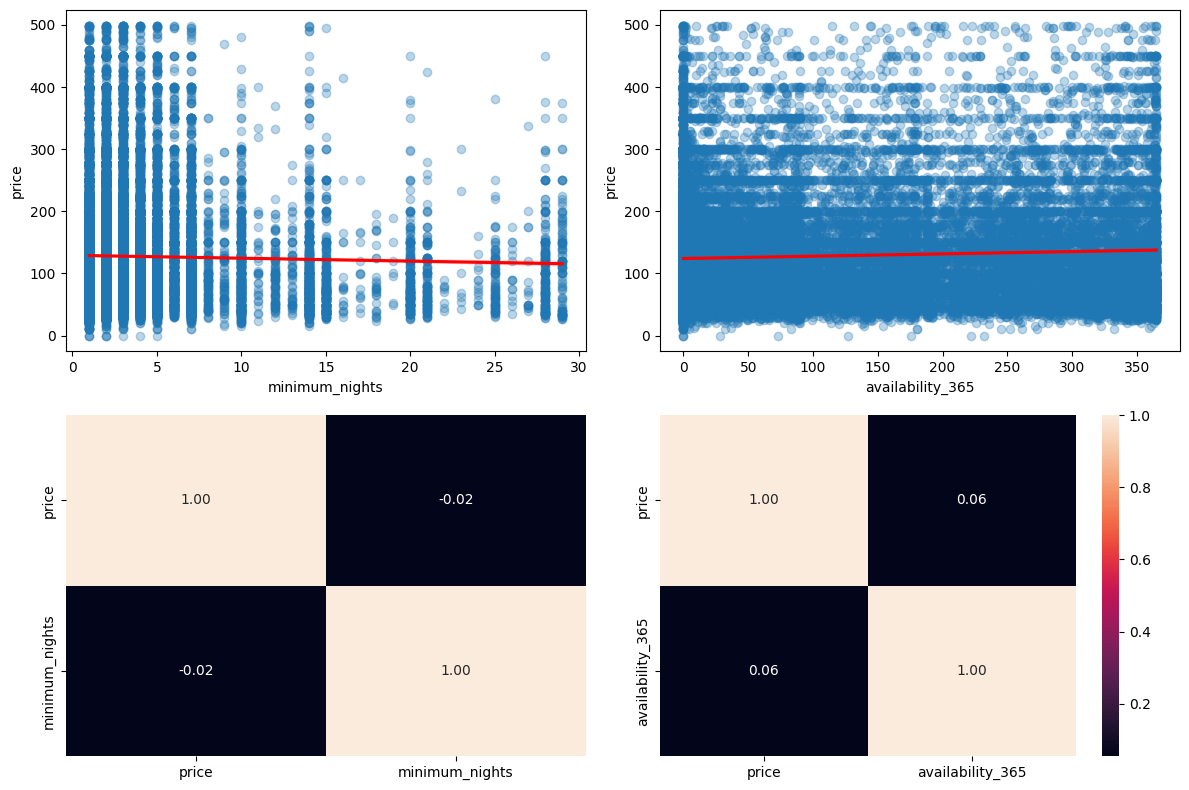

In [10]:
df_filtered_multi = filt_df[
    (filt_df['price'] < 500) &
    (filt_df['minimum_nights'] < 30) &
    (filt_df['number_of_reviews'] < 200) &
    (filt_df['calculated_host_listings_count'] < 50)
]

fig, axis = plt.subplots(2, 2, figsize=(12, 8))

sns.regplot(
    ax=axis[0, 0],
    data=df_filtered_multi,
    x="minimum_nights",
    y="price",
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}

)

sns.heatmap(
    df_filtered_multi[["price", "minimum_nights"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 0],
    cbar=False
)

sns.regplot(
    ax=axis[0, 1],
    data=df_filtered_multi,
    x="availability_365",
    y="price",
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)


sns.heatmap(
    df_filtered_multi[["price", "availability_365"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 1]
)

plt.tight_layout()
plt.show()


**Conclusions:**

- The relationship between the minimum number of nights and the price is very weak. There is a wide price range for low minimum stays, indicating that requiring longer stays does not necessarily imply higher prices.

- The regression line between price and availability is practically horizontal, reinforcing the idea of ​​a very low correlation.

- The analysis shows that numerical variables alone have little impact on price, and price is likely to be more influenced by categorical variables.


#### Analysis Categorical-Categorical

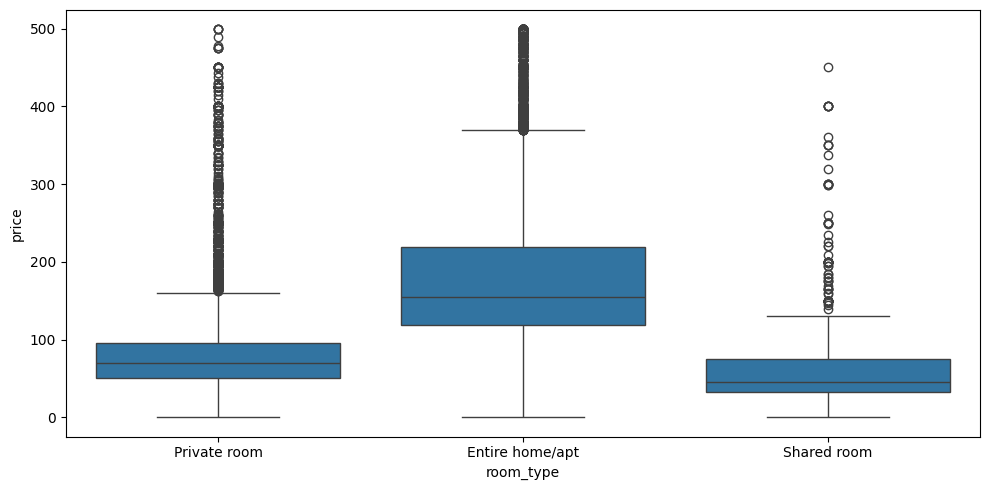

In [11]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=filt_df[filt_df['price'] < 500],
    x="room_type",
    y="price"
)

plt.tight_layout()
plt.show()


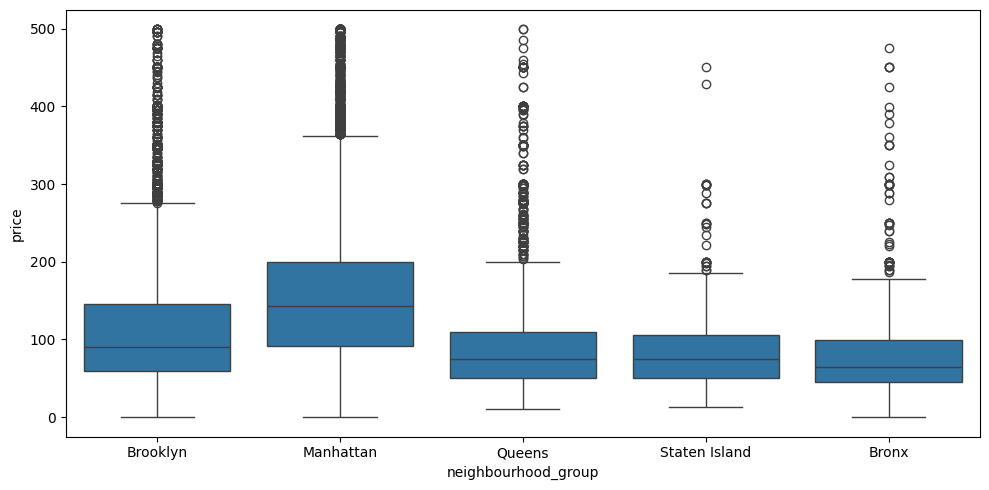

In [12]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=filt_df[filt_df['price'] < 500],
    x="neighbourhood_group",
    y="price"
)


plt.tight_layout()
plt.show()


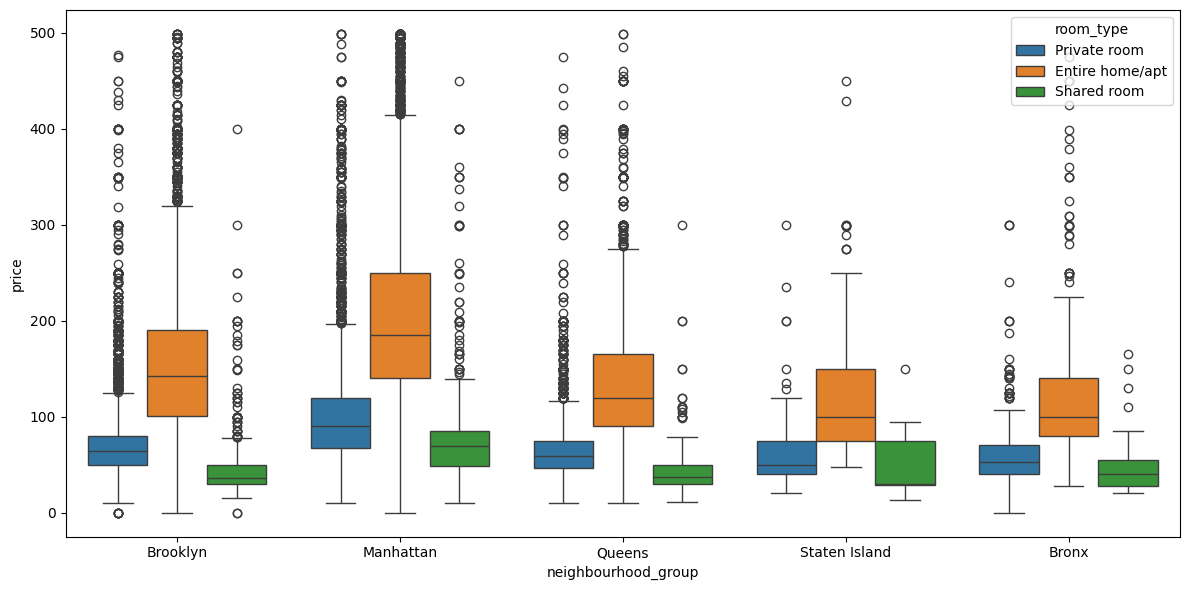

In [13]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=filt_df[filt_df['price'] < 500],
    x="neighbourhood_group",
    y="price",
    hue="room_type"
)

plt.tight_layout()
plt.show()

**Conclusions:**
##### By Room Type

- Entire homes have the highest median price and the greatest price dispersion, indicating a wide range of prices within this category.

- Private rooms show intermediate prices, with less variability than entire homes.

- Shared rooms have the lowest prices and a much more homogeneous distribution.


##### By Neighborhood

- Manhattan has the highest median price and the greatest variability, suggesting a wide diversity of accommodations and price levels.

- Brooklyn shows more moderate prices, although with considerable dispersion.

- Queens, the Bronx, and Staten Island have lower prices and more homogeneous distributions.

- The variability within some neighborhoods indicates that location, while important, does not act in isolation, but rather in combination with other factors such as the type of accommodation.


##### By Room Type and Neighborhood

- Accommodation prices clearly depend on the combination of neighborhood and room type, confirming the interaction between these two variables.

- In all neighborhoods, entire homes/apartments have the highest average prices, followed by private rooms, while shared rooms have the lowest prices.

- Manhattan consistently stands out as the neighborhood with the highest prices, even when comparing accommodations of the same type, reinforcing the importance of location in determining pricing.



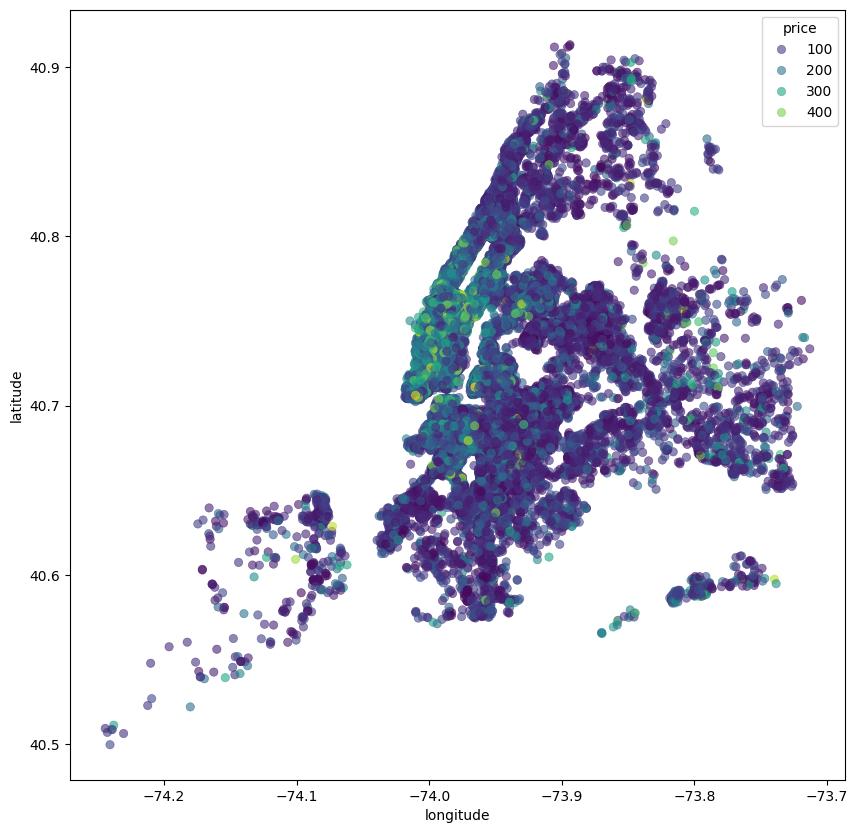

In [14]:
df_map = filt_df[(filt_df['price'] > 0) & (filt_df['price'] < 500)]

plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=df_map,
    x="longitude",
    y="latitude",
    hue="price",
    palette="viridis",
    alpha=0.6,
    edgecolor=None
)

plt.show()

**Conclusions:**

- There is a high concentration of prices in the city's most popular areas.

- There are clearly areas where prices are significantly higher, notably Manhattan and some parts of Brooklyn.

#### Correlation matrix

Categorical cols: ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


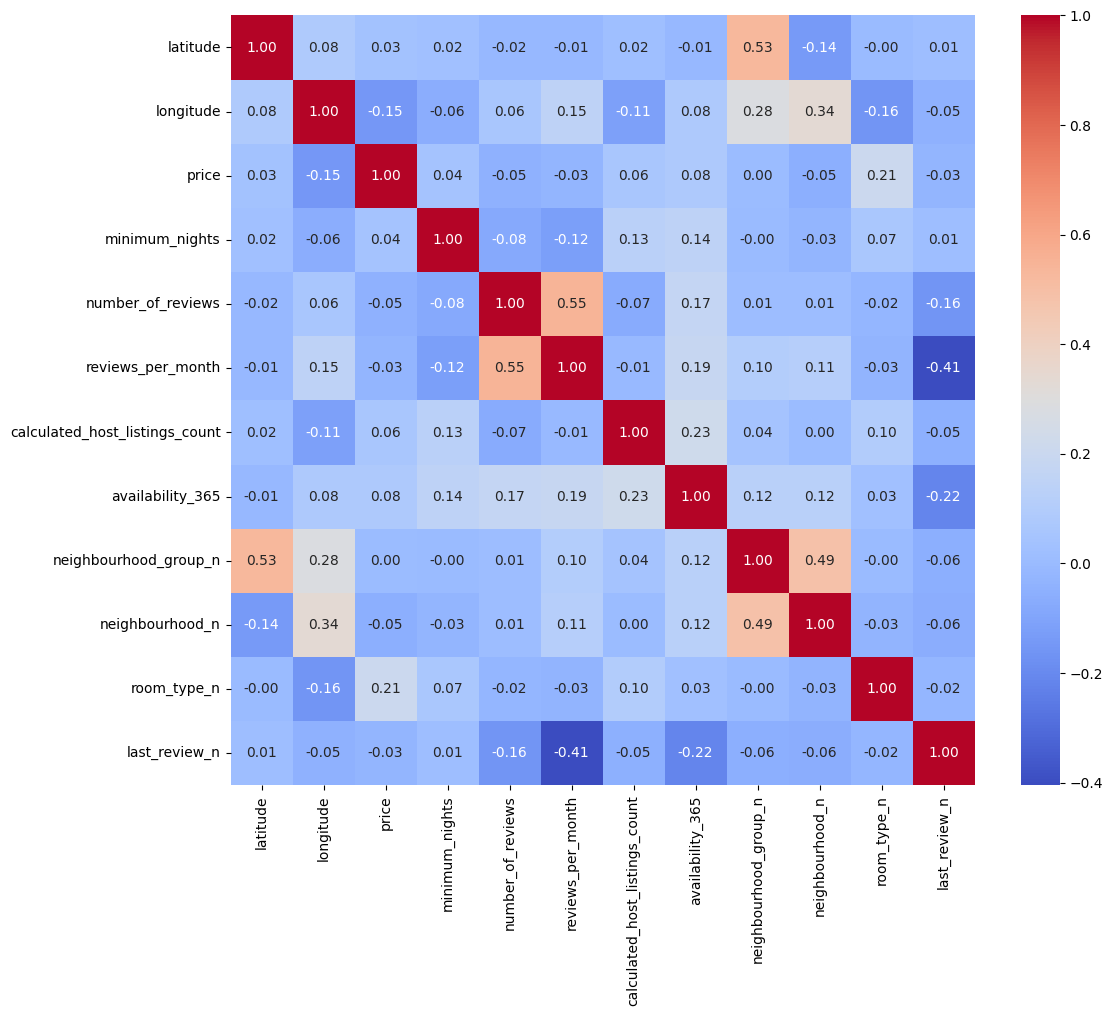

In [15]:
total_data = factorize_categorical(filt_df)
plot_correlation_heatmap(total_data)


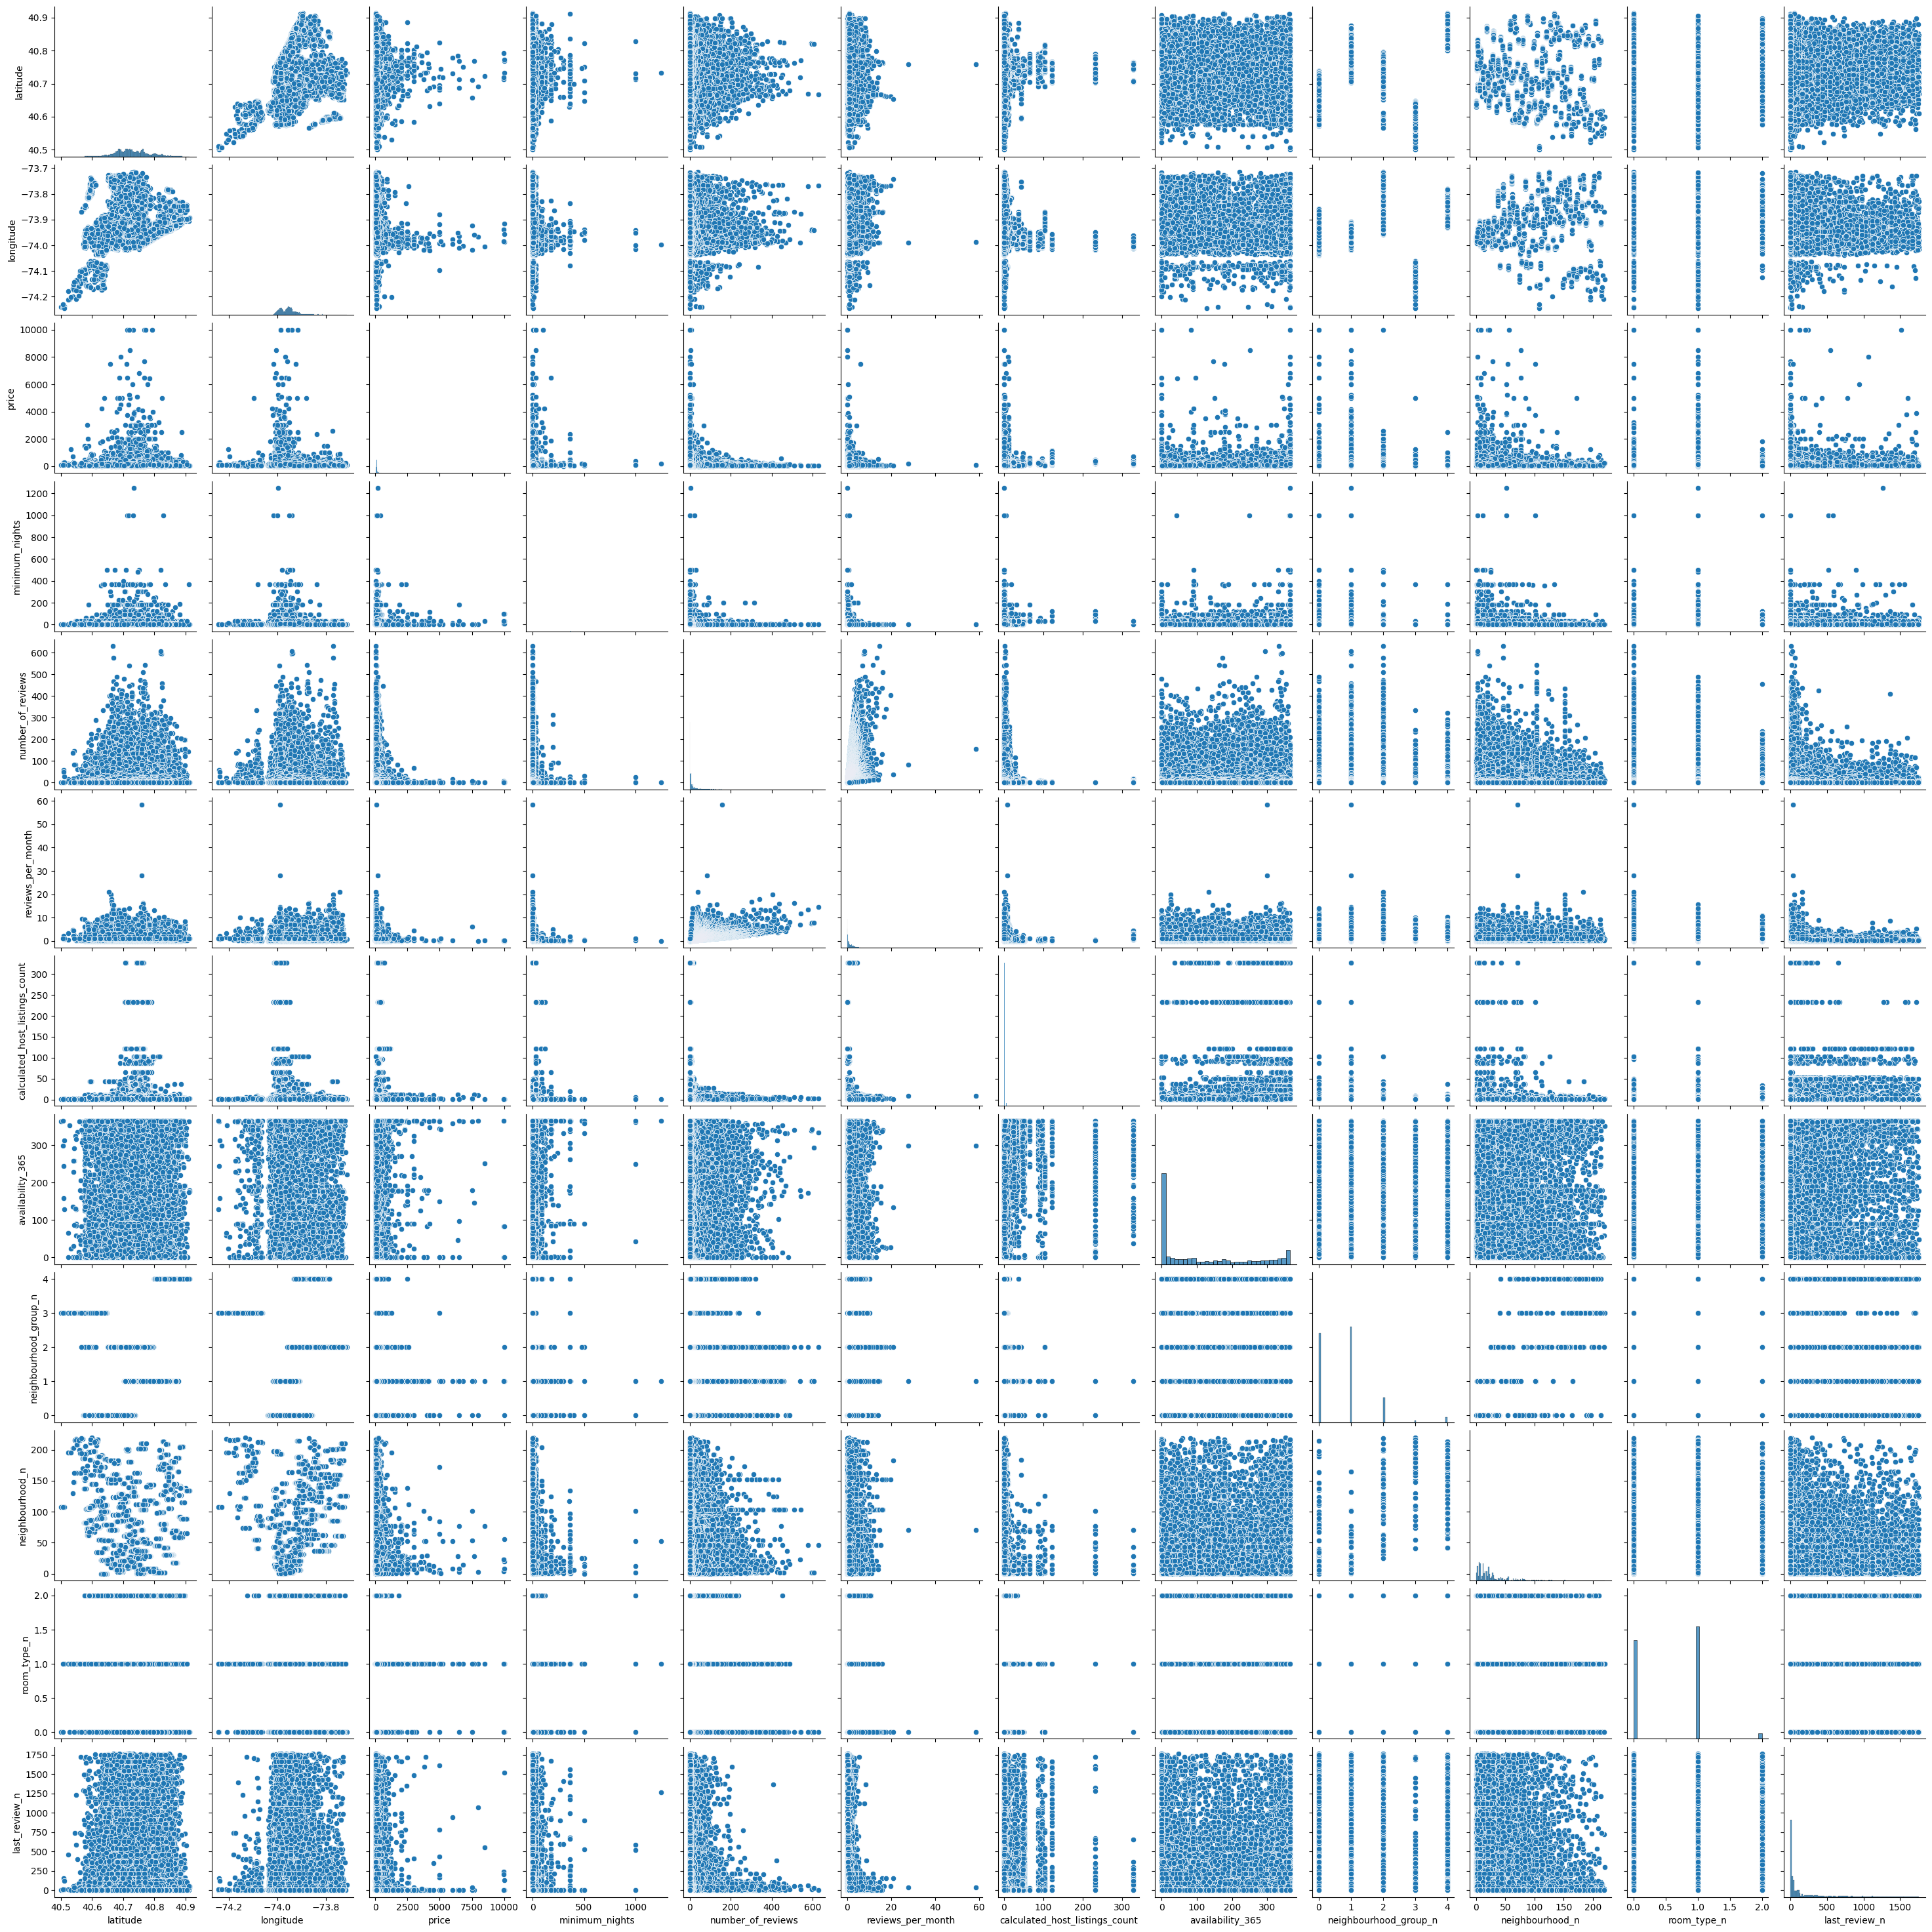

In [16]:
sns.pairplot(data = total_data)

### Featuure engineering

#### Outliers analysis

In [17]:
# Drop categoricals variables
FINAL_COLS = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "neighbourhood_group_n", "neighbourhood_n", "room_type_n", "last_review_n"]
total_data = total_data[FINAL_COLS]


total_data.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_n  neighbourhood_n   room_type_n  \
count      48895.000000           48895.000000     48895.000000  48895.000000   
mean         112.781327               0.786911        29.888782      0.567113   
std          131.622289               0.844386        34.676634      0.541249   
min            0.000000               0.000000         0.000000      0.000000   
25%            0.000000               0.000000         7.500000      0.000000   
50%           45.000000               1.000000        19.000000      1.000000   
75%          227.000000               1.000000        37.000000      1.000000   
max          365.000000               4.000000       220.000000      2.000000   

       last_review_n  
count   48895.000000  
mean      260.169874  
std       423.262882  
min        -1.000000  
25%         6.000000  
50%        46.000000  
75%       320.000000  
max      1763.000000

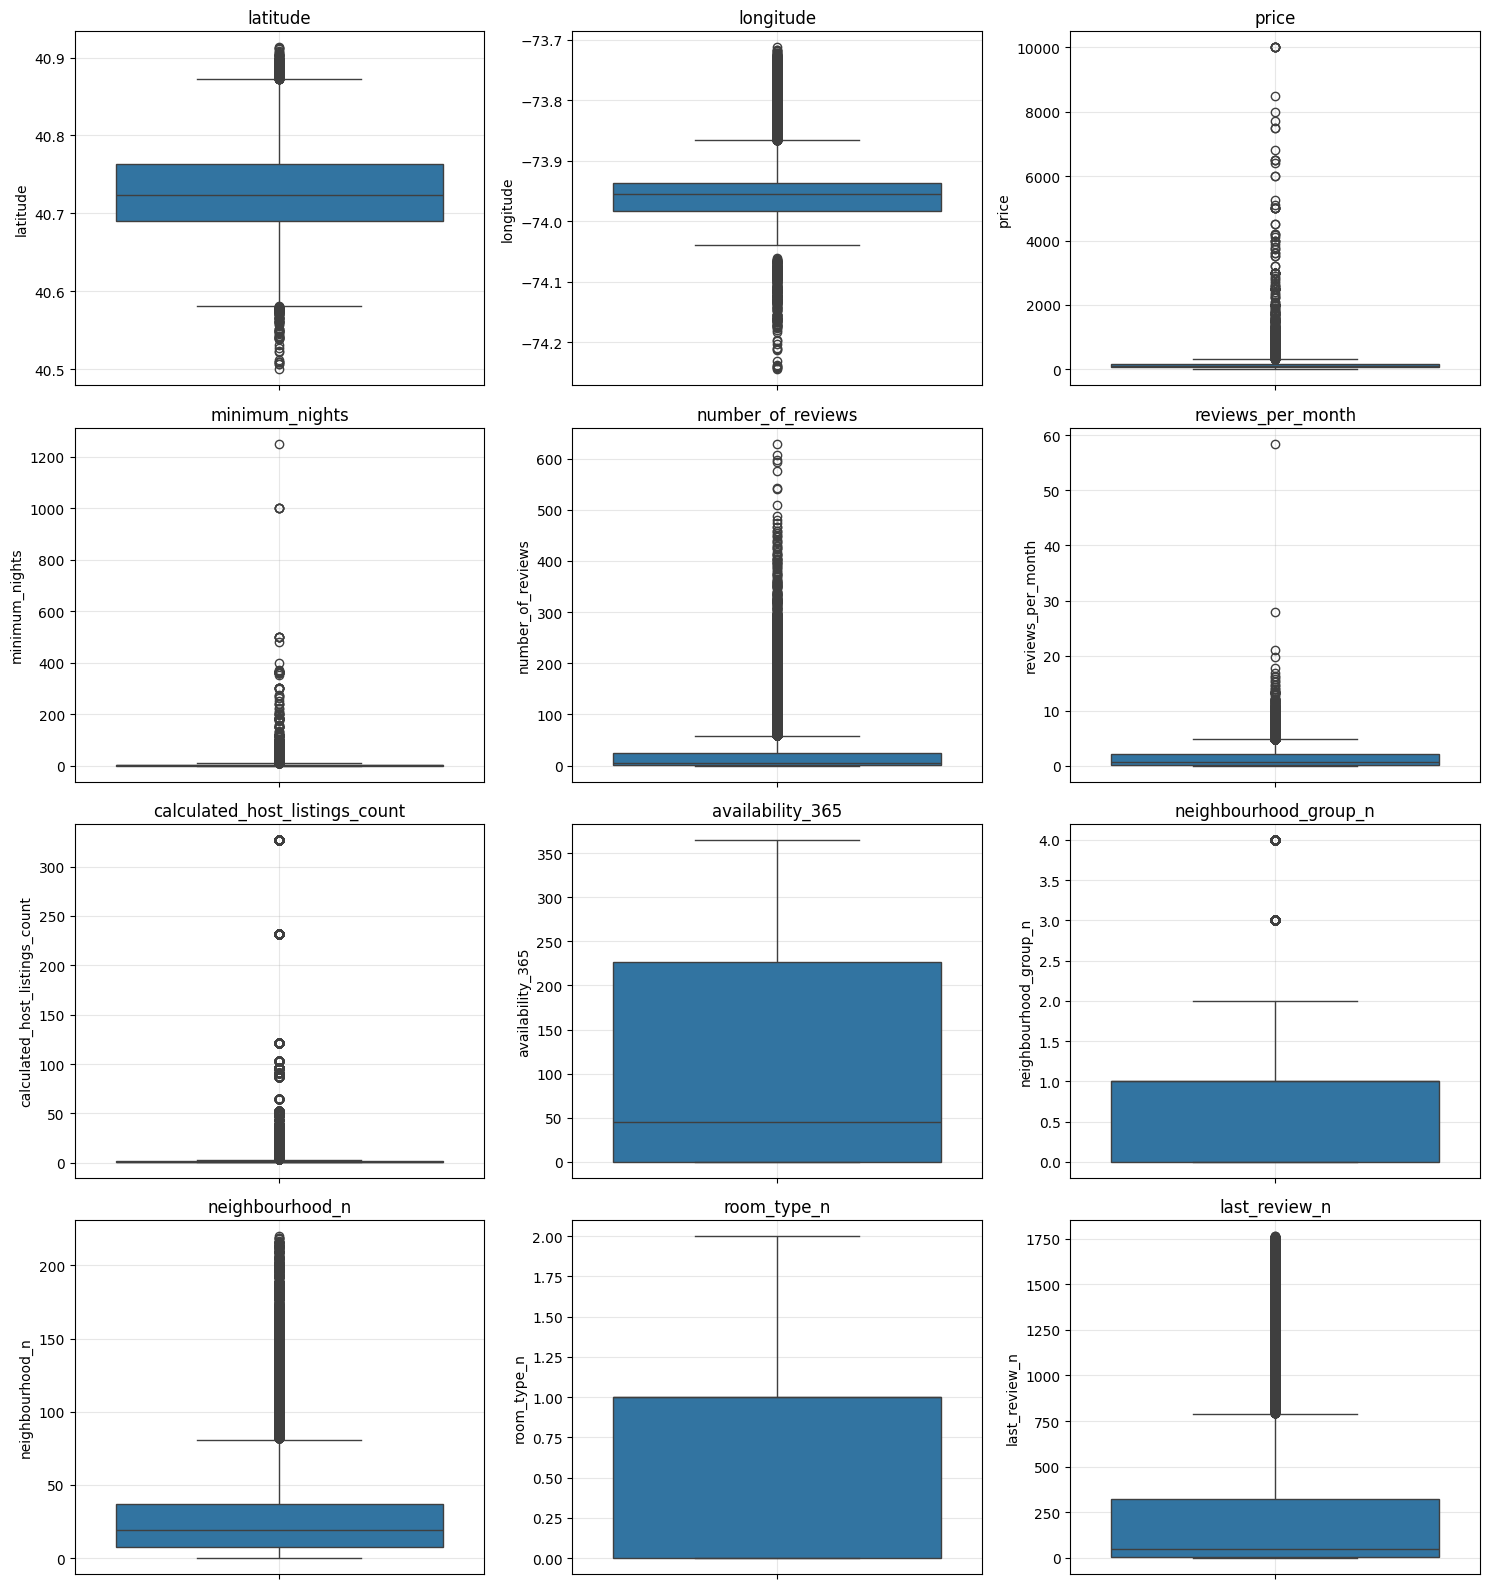

In [18]:
def plot_boxplots(
    df,
    cols=None,
    n_cols=3,
    figsize_per_plot=(5, 4)
):

    if cols is None:
        cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

    n_plots = len(cols)
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(figsize_per_plot[0] * n_cols,
                 figsize_per_plot[1] * n_rows)
    )

    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot(
            ax=axes[i],
            data=df,
            y=col
        )
        axes[i].set_title(col)
        axes[i].grid(alpha=0.3)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots(total_data)



#### Cap outliers variables and save JSON

In [19]:
total_data_with_outliers = total_data.copy()
total_data_without_outliers = total_data.copy()


outliers_cols = [col for col in numerical_cols if col != target]

outliers_dict = {}

for column in outliers_cols:
  total_data_without_outliers, limits = replace_outliers(column, total_data_without_outliers)
  outliers_dict[column] = limits

outliers_dict
with open("../data/interim/outliers_dict.xlsx", "w") as f:
  json.dump(outliers_dict, f)


The lower_limit of variable latitude is 40.581 and the upper_limit is 40.873 and the IQR is 0.073

The lower_limit of variable longitude is -74.244 and the upper_limit is -73.866 and the IQR is 0.047

The lower_limit of variable minimum_nights is 1 and the upper_limit is 11.0 and the IQR is 4.0

The lower_limit of variable number_of_reviews is 0 and the upper_limit is 58.5 and the IQR is 23.0

The lower_limit of variable reviews_per_month is 0.01 and the upper_limit is 4.765 and the IQR is 1.83

The lower_limit of variable calculated_host_listings_count is 1 and the upper_limit is 3.5 and the IQR is 1.0

The lower_limit of variable availability_365 is 0 and the upper_limit is 567.5 and the IQR is 227.0


#### Missing values analysis

In [20]:
check_missing_values(total_data_with_outliers)

reviews_per_month    10052
dtype: int64

In [21]:
check_missing_values(total_data_without_outliers)

reviews_per_month    10052
dtype: int64

In [ ]:
total_data_with_outliers = fill_missing_values(total_data_with_outliers, median_cols= None, mode_cols= None, mean_cols= ["reviews_per_month"])

total_data_without_outliers = fill_missing_values(total_data_with_outliers, median_cols= None, mode_cols= None, mean_cols= ["reviews_per_month"])

check_missing_values(total_data_with_outliers)

Series([], dtype: int64)

In [23]:
check_missing_values(total_data_without_outliers)

Series([], dtype: int64)

#### Inference of new features

In [24]:
"""
In this df we dont want merge any varibles.
merge = ""
first_element = ""
second_element = ""

total_data_with_outliers, total_data_without_outliers = merge_columns(total_data_with_outliers, total_data_without_outliers, merge, first_element, second_element)

total_data_with_outliers.head()
total_data_without_outliers.head()
"""

'\nIn this df we dont want merge any varibles.\nmerge = ""\nfirst_element = ""\nsecond_element = ""\n\ntotal_data_with_outliers, total_data_without_outliers = merge_columns(total_data_with_outliers, total_data_without_outliers, merge, first_element, second_element)\n\ntotal_data_with_outliers.head()\ntotal_data_without_outliers.head()\n'

### Feature Scaling
#### Split train and test

In [26]:
predictors = total_data_with_outliers.columns.drop(target)

X_WITH_outliers = total_data_with_outliers[predictors]
X_WITHOUT_outliers = total_data_without_outliers[predictors]
y = total_data_with_outliers[target]

X_train_WITH_outliers, X_test_WITH_outliers, y_train, y_test = train_test_split(X_WITH_outliers, y, test_size = 0.2, random_state = 10)
X_train_WITHOUT_outliers, X_test_WITHOUT_outliers = train_test_split(X_WITHOUT_outliers, test_size = 0.2, random_state = 10)



#### Normalization
##### With outliers

In [27]:
norm_WITH_outliers = StandardScaler()
norm_WITH_outliers.fit(X_train_WITH_outliers)

X_train_WITH_outliers_norm = norm_WITH_outliers.transform(X_train_WITH_outliers)
X_train_WITH_outliers_norm = pd.DataFrame(X_train_WITH_outliers_norm, index = X_train_WITH_outliers.index, columns = predictors)

X_test_WITH_outliers_norm = norm_WITH_outliers.transform(X_test_WITH_outliers)
X_test_WITH_outliers_norm = pd.DataFrame(X_test_WITH_outliers_norm, index = X_test_WITH_outliers.index, columns = predictors)



##### Without outliers

In [28]:
norm_WITHOUT_outliers = StandardScaler()
norm_WITHOUT_outliers.fit(X_train_WITHOUT_outliers)

X_train_WITHOUT_outliers_norm = norm_WITHOUT_outliers.transform(X_train_WITHOUT_outliers)
X_train_WITHOUT_outliers_norm = pd.DataFrame(X_train_WITHOUT_outliers_norm, index = X_train_WITHOUT_outliers.index, columns = predictors)

X_test_WITHOUT_outliers_norm = norm_WITHOUT_outliers.transform(X_test_WITHOUT_outliers)
X_test_WITHOUT_outliers_norm = pd.DataFrame(X_test_WITHOUT_outliers_norm, index = X_test_WITHOUT_outliers.index, columns = predictors)



#### Min-Max Scaling
##### With outliers

In [29]:
scaler_WITH_outliers = MinMaxScaler()
scaler_WITH_outliers.fit(X_train_WITH_outliers)

X_train_WITH_outliers_scal = scaler_WITH_outliers.transform(X_train_WITH_outliers)
X_train_WITH_outliers_scal = pd.DataFrame(X_train_WITH_outliers_scal, index = X_train_WITH_outliers.index, columns = predictors)

X_test_WITH_outliers_scal = scaler_WITH_outliers.transform(X_test_WITH_outliers)
X_test_WITH_outliers_scal = pd.DataFrame(X_test_WITH_outliers_scal, index = X_test_WITH_outliers.index, columns = predictors)

##### Without outliers

In [30]:
scaler_WITHOUT_outliers = MinMaxScaler()
scaler_WITHOUT_outliers.fit(X_train_WITHOUT_outliers)

X_train_WITHOUT_outliers_scal = scaler_WITHOUT_outliers.transform(X_train_WITHOUT_outliers)
X_train_WITHOUT_outliers_scal = pd.DataFrame(X_train_WITHOUT_outliers_scal, index = X_train_WITHOUT_outliers.index, columns = predictors)

X_test_WITHOUT_outliers_scal = scaler_WITHOUT_outliers.transform(X_test_WITHOUT_outliers)
X_test_WITHOUT_outliers_scal = pd.DataFrame(X_test_WITHOUT_outliers_scal, index = X_test_WITHOUT_outliers.index, columns = predictors)

### SAVE FILES

In [31]:
X_train_WITH_outliers.to_excel("../data/processed/X_train_WITH_outliers.xlsx", index = False)
X_train_WITH_outliers_norm.to_excel("../data/processed/X_train_WITH_outliers_norm.xlsx", index = False)
X_train_WITH_outliers_scal.to_excel("../data/processed/X_train_WITH_outliers_scal.xlsx", index = False)
X_train_WITHOUT_outliers.to_excel("../data/processed/X_train_WITHOUT_outliers.xlsx", index = False)
X_train_WITHOUT_outliers_norm.to_excel("../data/processed/X_train_WITHOUT_outliers_norm.xlsx", index = False)
X_train_WITHOUT_outliers_scal.to_excel("../data/processed/X_train_WITHOUT_outliers_scal.xlsx", index = False)

X_test_WITH_outliers.to_excel("../data/processed/X_test_WITH_outliers.xlsx", index = False)
X_test_WITH_outliers_norm.to_excel("../data/processed/X_test_WITH_outliers_norm.xlsx", index = False)
X_test_WITH_outliers_scal.to_excel("../data/processed/X_test_WITH_outliers_scal.xlsx", index = False)
X_test_WITHOUT_outliers.to_excel("../data/processed/X_test_WITHOUT_outliers.xlsx", index = False)
X_test_WITHOUT_outliers_norm.to_excel("../data/processed/X_test_WITHOUT_outliers_norm.xlsx", index = False)
X_test_WITHOUT_outliers_scal.to_excel("../data/processed/X_test_WITHOUT_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/norm_WITH_outliers.pkl", "wb") as file:
  pickle.dump(norm_WITH_outliers, file)
with open("../models/norm_WITHOUT_outliers.pkl", "wb") as file:
  pickle.dump(norm_WITHOUT_outliers, file)
with open("../models/scaler_WITH_outliers.pkl", "wb") as file:
  pickle.dump(scaler_WITH_outliers, file)
with open("../models/scaler_WITHOUT_outliers.pkl", "wb") as file:
  pickle.dump(scaler_WITHOUT_outliers, file)

### Feature selection

In [36]:
X_train = X_train_WITH_outliers.copy()
X_test = X_test_WITH_outliers.copy()

k_features = 10

selection_model = SelectKBest(f_classif, k = k_features)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

selected_features = X_train.columns[ix]


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])


print("Total number of features:", X_train.shape[1])
print("Features selected:", len(selected_features))

X_train_sel.head()

Total number of features: 11
Features selected: 10


latitude  longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0  40.72431  -73.98312             1.0                1.0               0.02   
1  40.74807  -73.91343             3.0                4.0               2.79   
2  40.67895  -73.97233             4.0                5.0               0.10   
3  40.60531  -74.08893             4.0               16.0               1.30   
4  40.72318  -73.85621            14.0                1.0               0.22   

   calculated_host_listings_count  availability_365  neighbourhood_n  \
0                             4.0               0.0             19.0   
1                             1.0             110.0             39.0   
2                             1.0              21.0             29.0   
3                             7.0             334.0            110.0   
4                             1.0               7.0             87.0   

   room_type_n  last_review_n  
0          0.0          162.0  
1          1.0            9.0  
2          1.0          513.0  
3          0.0           13.0  
4          1.0         1118.0